# 6.1 데이터 수집 1 - 한 페이지 크롤링

## 6.1.1 다나와 소개
- 가격비교 사이트
- 무선청소기 제품의 가격과 스펙 목록 수집

## 6.1.2 다나와 검색 페이지 접속

In [1]:
from selenium import webdriver
driver = webdriver.Chrome('C:/Users/YHI/chromedriver.exe')
url = 'http://search.danawa.com/dsearch.php?query=무선청소기&tab=main'
driver.get(url)

## 6.1.3 다나와 검색 웹 페이지에서 상품 정보 가져오기

In [2]:
from bs4 import BeautifulSoup
# 1페이지 나온 상품정보 수집해보기
html= driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [3]:
prod_items = soup.select('li.prod_item')
len(prod_items)

44

In [4]:
prod_items = soup.select('ul.product_list > li.prod_item')
len(prod_items)

44

In [5]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

41

In [6]:
# 상품명 정보 가져오기
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
title

'샤오미 차량용 청소기 무선 3세대 (해외구매)'

In [7]:
# 스펙 목록 정보 가져오기
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
spec_list

'차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬, 연장호스 / 사용시간: 25분 / 크기 : 369x72mm / 무게 : 560g'

In [8]:
price = prod_items[0].select('p.price_sect > a > strong')[0].text.strip().replace(",", "")
price

'52120'

In [9]:
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
prod_data = []
for prod_item in prod_items:
    try:
        title = prod_item.select('p.prod_name > a')[0].text.strip()
    except:
        title = ''
    try:
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
    except:
        spec_list = ''
    try:
        price = int(prod_item.select('p.price_sect > a > strong')[0].text.strip().replace(",", ""))
    except:
        price = 0
    prod_data.append([title, spec_list, price])
    
print(len(prod_data))
print(prod_data)

41
[['샤오미 차량용 청소기 무선 3세대 (해외구매)', '차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬, 연장호스 / 사용시간: 25분 / 크기 : 369x72mm / 무게 : 560g', 52120], ['LG전자 코드제로 A9S A9700', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단계여과 / 인버터모터 / 흡입력: 200W / 충전시간: 4시간 / 사용시간: 2시간 / 배터리: 리튬이온 (2개) / 구성: 바닥, 물걸레, 침구, 솔형, 굳은먼지, 상부청소, 틈새, 긴틈새, 매트리스, 연장툴, 거치대 / 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / WiFi / 색상:판타지실버 / 소비전력: 590W / 미세먼지인증(SLG) / 크기(가로x세로x깊이): 250x1120x260mm', 1032630], ['9dtSQumlgj', '9dtSQumlgj975866', 975866], ['샤오미 드리미 V10', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H12급 / 5단계여과 / 흡입력: 140AW / 흡입력: 22000Pa / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 1시간 / 용량: 2500mAh / 구성: 바닥, 침구, 솔형, 틈새, 연장툴, 거치대 / 무게: 1.5kg / 색상:화이트 / 소비전력: 450W', 146400], ['삼성전자 제트 VS15R8500BF', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.6V / 헤파필터 / 싸이클론 / 5단계여과 / 인버터모터 / 흡입력: 150W / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 40분 / 배터리: 리튬이온 / 구성: 바닥, 솔형, 틈새, 거치대 / 디스플레이표시창 / 프리볼트 / 무게: 2.57kg / 색상:틸민트 / 소비전력: 410W / 알레르기인증(BAF) / 미세먼지인증(

In [10]:
# 상품 정보 태그에서 원하는 정보를 추출하는 함수
def get_prod_items(prod_itmes):
    prod_data = []
    
    for prod_item in prod_items:
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except:
            title = ''
        try:
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''
        try:
            price = int(prod_item.select('p.price_sect > a > strong')[0].text.strip().replace(",", ""))
        except:
            price = 0
        prod_data.append([title, spec_list, price])
        
    return prod_data

In [11]:
# 상품 정보를 가져오는 함수 테스트
prod_items = soup.select('#productListArea div.main_prodlist.main_prodlist_list ul.product_list li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

41


# 6.2 데이터 수집 2 - 여러 페이지에 걸친 검색 페이지 크롤링

## 6.2.1 다나와 검색 결과 페이지 URL 분석

In [12]:
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods'.format(keyword, page)

keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)


## 6.2.2 주피터 노트북의 진행표시줄 처리

In [36]:
# tqdm 사용법
import time
from tqdm import tqdm_notebook

total_page = 10
for page in tqdm_notebook(range(1, total_page+1)):
    # 페이지가 로딩 완료되기 위한 시간을 2초로 준다.
    time.sleep(2)    

c:\users\yhi\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


## 6.2.3 여러 페이지에 걸친 상품 정보 수집

In [13]:
# 실전 다나와 크롤링
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

driver = webdriver.Chrome('C:/Users/YHI/chromedriver.exe')
# 암묵적으로 웹 자원 로드를 위해 3초까지 기다림
driver.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10
prod_data_total = []

# 진행 정도를 표현하는 tqdm
for page in tqdm_notebook(range(1, total_page+1)):
    # 검색 페이지 이동
    url = get_search_page_url(keyword, page)
    driver.get(url)
    # 로딩시간 5초 부여
    time.sleep(5)
    
    # 현재 페이지의 HTML 정보 가져오기
    html= driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 상품 정보 추출
    prod_items = soup.select('#productListArea div.main_prodlist.main_prodlist_list ul.product_list li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # 추출 데이터 저장
    prod_data_total = prod_data_total + prod_item_list

c:\users\yhi\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


## 6.2.4 수집 데이터 저장

In [14]:
import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙목록', '가격']
data.to_excel('files/danawa_crawling_result.xlsx', index=False)

# 6.3 다나와 크롤링 데이터 전처리
- 1. 상품명 데이터에서 회사명과 제품명 분리
- 2. 일반 문자열로 저장된 스펙목록을 필요한 스펙으로 분류 및 단위 통합

## 6.3.1 다나와 크롤링 데이터 불러오기

In [16]:
import pandas as pd
data = pd.read_excel('files/danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙목록    400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙목록,가격
0,샤오미 차량용 청소기 무선 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",52120
1,LG전자 코드제로 A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 헤파필터 / 2중터보싸이클론 / 5단...,1032630
2,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,146400
3,삼성전자 제트 VS15R8500BF,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.6V / 헤파필터 / 싸...,385200
4,삼성전자 제트 VS20T9213QDCS,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.6V / 헤파필터 / 싸...,631720


## 6.3.2 회사명, 모델명 정리

In [17]:
company_list = []
product_list = []

for title in data['상품명']:
    title_info = title.split(' ', 1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

## 6.3.3 스펙 목록 데이터 살펴보기

In [18]:
data['스펙목록'][0]

'차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬, 연장호스 / 사용시간: 25분 / 크기 : 369x72mm / 무게 : 560g'

In [19]:
# 첫 번째 제품의 스펙 목록 분리
spec_list = data['스펙목록'][0].split(' / ')
spec_list

['차량용청소기',
 '무선',
 '흡입력: 16,800Pa',
 '최대출력: 120W',
 '헤파필터',
 '추가노즐: 틈새, 솔브러쉬, 연장호스',
 '사용시간: 25분',
 '크기 : 369x72mm',
 '무게 : 560g']

In [20]:
# 카테고리 정보 추출
category = spec_list[0]
category

'차량용청소기'

## 6.3.4 스펙 목록에서 카테고리, 사용시간, 흡입력을 추출 후 정리

In [21]:
# '사용시간', '흡입력'이 포함된 원소 추출
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec

print(use_time_spec)
print(suction_spec)

사용시간: 25분
흡입력: 16,800Pa


In [22]:
# 정량적인 수치 추출 
use_time_value = use_time_spec.split(' ')[1].strip() 
suction_value = suction_spec.split(' ')[1].strip()
print(use_time_value)
print(suction_value)

25분
16,800Pa


In [23]:
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙목록']:
    # ' / '기준으로 분리
    spec_list = spec_data.split(' / ')
    
    # 카테고리 추출하기
    category = spec_list[0]
    category_list.append(category)
    
     # 사용시간, 흡입력 추출 
    ## 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성 
    use_time_value = None 
    suction_value = None 
    
    ## spec_list의 각 원소에서 사용시간, 흡입력 수치 추출
    for spec in spec_list:
        if '사용시간' in spec: 
            use_time_value = spec.split(' ')[1].strip()             
        if '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip() 
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [24]:
# 카테고리, 사용시간, 흡입력에 대한 전처리 결과 확인
print("카테고리", len(category_list), category_list[0:5])
print("사용시간", len(use_time_list), use_time_list[0:5])
print("흡입력", len(suction_value), suction_list[0:5])

카테고리 400 ['차량용청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기']
사용시간 400 ['25분', '2시간', '1시간', '40분', '1시간']
흡입력 7 ['16,800Pa', '200W', '22000Pa', '150W', '200W']


In [25]:
time_list = pd.DataFrame(use_time_list)
time_list.to_excel('files/time_list_sample.xlsx', index = False)

## 6.3.5 무선청소기 사용시간 단위 통일시기키

In [26]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            if '~' in time:
                hour1, hour2 = time.split('시간')[0].split('~')
                hour = (int(hour1) + int(hour2))/2
            else:
                hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            if '~' in time:
                min1, min2 = time.split('분')[0].split('~')
                minute = (int(min1) + int(min2))/2
            else:
                minute = time.split('분')[0]
        return float(hour)*60 + int(minute)
    except:
        return None

In [27]:
# 사용시간을 분 단위로 조정하는 함수의 테스트
times = ["40분", "4분", "1시간", "3시간30분", "4시간", "2~3시간", "20~30분"]
for time in times:
    time_value = convert_time_minute(time)
    print(time, "=", time_value)

40분 = 40.0
4분 = 4.0
1시간 = 60.0
3시간30분 = 210.0
4시간 = 240.0
2~3시간 = 150.0
20~30분 = 25.0


In [28]:
# 모델별 사용시간을 분 단위로 통일하기
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
print(len(new_use_time_list))
print(new_use_time_list[0:10])

400
[25.0, 120.0, 60.0, 40.0, 60.0, 48.0, 60.0, 120.0, 120.0, 60.0]


## 6.3.6 무선 청소기 흡입력 단위 통일시키기

In [29]:
# 흡입력 단위 통일 함수
def get_suction(value):
    try:
        value = value.upper()
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W","")
            result = int(result.replace(",",""))
        elif "PA" in value:
            result = value.replace("PA","")
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except:
        return None 

In [30]:
# 흡입력 단위 통일시키기
new_suction_list = []
for power in suction_list:
    value = get_suction (power)
    new_suction_list.append(value)

print(len(new_suction_list))
print(new_suction_list[0:10])

400
[168.0, 200, 220.0, 150, 200, 180.0, 160, 200, 200, 200]


## 6.3.7 다나와 전처리 결과를 엑셀로 저장

In [31]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,차량용청소기,샤오미,차량용 청소기 무선 3세대 (해외구매),52120,25.0,168.0
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1032630,120.0,200.0
2,핸디/스틱청소기,샤오미,드리미 V10,146400,60.0,220.0
3,핸디/스틱청소기,삼성전자,제트 VS15R8500BF,385200,40.0,150.0
4,핸디/스틱청소기,삼성전자,제트 VS20T9213QDCS,631720,60.0,200.0


In [32]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    400 non-null    object 
 1   회사명     400 non-null    object 
 2   제품      400 non-null    object 
 3   가격      400 non-null    int64  
 4   사용시간    372 non-null    float64
 5   흡입력     221 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ KB


In [33]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기    313
물걸레청소기       38
차량용청소기       28
욕실청소기         9
침구청소기         6
업소용청소기        4
진공청소기         2
Name: 카테고리, dtype: int64

In [34]:
# 핸디/스틱청소기만 선택
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)
pd_data_final.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
1,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1032630,120.0,200.0
2,핸디/스틱청소기,샤오미,드리미 V10,146400,60.0,220.0
3,핸디/스틱청소기,삼성전자,제트 VS15R8500BF,385200,40.0,150.0
4,핸디/스틱청소기,삼성전자,제트 VS20T9213QDCS,631720,60.0,200.0
5,핸디/스틱청소기,샤오미,TROUVER TECH SOLO10,97500,48.0,180.0


In [35]:
# 엑셀로 저장
pd_data_final.to_excel('files/danawa_data_final.xlsx', index = False)

# 6.4 무선청소기 모델별 비교 분석

## 6.4.1 데이터 살펴보기

In [36]:
import pandas as pd
danawa_data = pd.read_excel('files/danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1032630,120.0,200.0
1,핸디/스틱청소기,샤오미,드리미 V10,146400,60.0,220.0
2,핸디/스틱청소기,삼성전자,제트 VS15R8500BF,385200,40.0,150.0
3,핸디/스틱청소기,삼성전자,제트 VS20T9213QDCS,631720,60.0,200.0
4,핸디/스틱청소기,샤오미,TROUVER TECH SOLO10,97500,48.0,180.0


In [37]:
top_list = danawa_data.sort_values(['흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
216,핸디/스틱청소기,리하스,LH20,284050,120.0,330.0
185,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290.0
202,핸디/스틱청소기,퍼피유,T12R,383950,60.0,290.0
152,핸디/스틱청소기,샤오미,드리미 V12,389000,90.0,270.0
44,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,203410,60.0,260.0


In [38]:
top_list = danawa_data.sort_values(['사용시간'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1032630,120.0,200.0
56,핸디/스틱청소기,LG전자,코드제로 A9S 펫 A9700,1095120,120.0,200.0
35,핸디/스틱청소기,삼성전자,제트 VS20T9279S6CS,854950,120.0,200.0
144,핸디/스틱청소기,삼성전자,제트 VS20T9257SD,687250,120.0,200.0
190,핸디/스틱청소기,삼성전자,제트 VS20R9078S2CS,821370,120.0,200.0


In [39]:
# 사용시간을 우선순위로 두고, 같은 값일 경우 흡입력으로 우선순위를 매긴다.
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
216,핸디/스틱청소기,리하스,LH20,284050,120.0,330.0
0,핸디/스틱청소기,LG전자,코드제로 A9S A9700,1032630,120.0,200.0
6,핸디/스틱청소기,삼성전자,제트 VS20T9258SDCS,899000,120.0,200.0
7,핸디/스틱청소기,LG전자,코드제로 A9S A9570,980950,120.0,200.0
14,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,628280,120.0,200.0


## 6.4.2 가성비 좋은 제품 찾아보기

In [40]:
# 가격, 사용시간, 흡입력 평균값
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 375835.69009584666
흡입력 평균값 162.83937823834196
사용시간 평균값 48.0271186440678


In [41]:
# 가성비 좋은 제품 탐색
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
1,핸디/스틱청소기,샤오미,드리미 V10,146400,60.0,220.0
17,핸디/스틱청소기,샤오미,SHUNZAO Z11,0,60.0,260.0
19,핸디/스틱청소기,샤오미,드리미 V11,262990,90.0,250.0
37,핸디/스틱청소기,샤오미,드리미 V9,286080,60.0,200.0
44,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,203410,60.0,260.0
45,핸디/스틱청소기,델로라,V11 파워 300W,138950,70.0,220.0
58,핸디/스틱청소기,샤오미,드리미 V10P,237360,60.0,220.0
91,핸디/스틱청소기,샤오미,로이드미 제로,221040,60.0,220.0
129,핸디/스틱청소기,캐치웰,코드엑스,199000,60.0,220.0
131,핸디/스틱청소기,샤오미,드리미 V9P,173940,60.0,200.0


## 6.4.3 데이터 시각화

In [42]:
# 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

In [43]:
# 결측값 없애기
chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

188

In [44]:
# 흡입력, 사용시간 최대, 최소
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

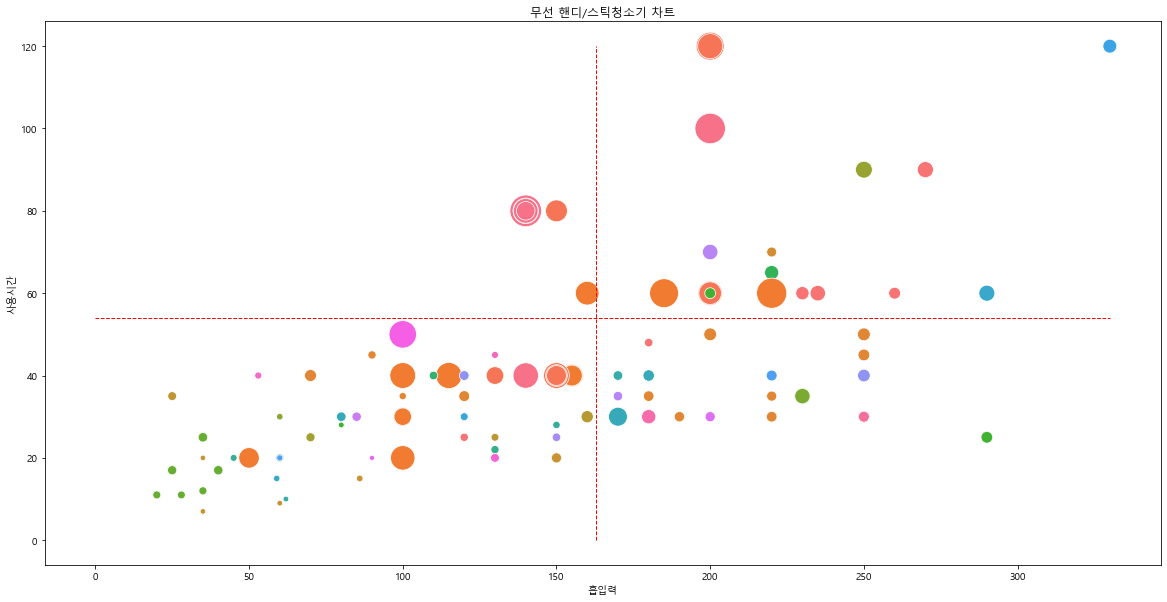

In [45]:
# 청소기 성능 시각화
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
             data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 )
plt.show()

## 6.4.4 인기 제품의 데이터 시각화

In [46]:
# 인기 제품 선택
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

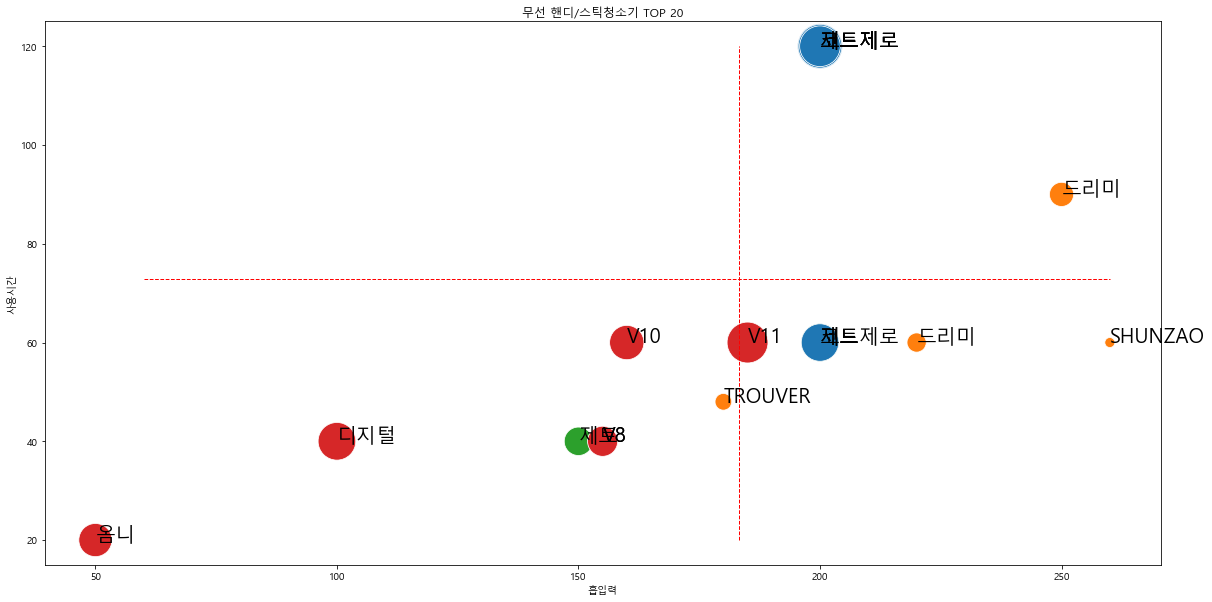

In [47]:
# 예제 7-45 흡입력, 사용시간의 최댓값/최솟값 정리
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (100, 2000),
                  legend = False)
plt.plot([60, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [20, use_time_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()